In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import FastMarkerCluster
from branca.colormap import LinearColormap
import plotly_express as px
from scipy.stats import ttest_ind
from scipy.stats import shapiro
from scipy.stats import f_oneway
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LinearRegression
import warnings

In [2]:

# Carga de datos
in19 = pd.read_csv('C:/Users/marco/OneDrive/Escritorio/CURSO/Trabajo final/input/Incidencia_2019_Provincia.csv', sep=';')
in20 = pd.read_csv('C:/Users/marco/OneDrive/Escritorio/CURSO/Trabajo final/input/Incidencia_2020_Provincia.csv', sep=';')
in21 = pd.read_csv('C:/Users/marco/OneDrive/Escritorio/CURSO/Trabajo final/input/Incidencia_2021_Provincia.csv', sep=';')
in22 = pd.read_csv('C:/Users/marco/OneDrive/Escritorio/CURSO/Trabajo final/input/Incidencia_2022_Provincia.csv', sep=';')
mo19 = pd.read_csv('C:/Users/marco/OneDrive/Escritorio/CURSO/Trabajo final/input/Mortalidad_2019_Provincia.csv', sep=';')
mo20 = pd.read_csv('C:/Users/marco/OneDrive/Escritorio/CURSO/Trabajo final/input/Mortalidad_2020_Provincia.csv', sep=';')
mo21 = pd.read_csv('C:/Users/marco/OneDrive/Escritorio/CURSO/Trabajo final/input/Mortalidad_2021_Provincia.csv', sep=';')
mo22 = pd.read_csv('C:/Users/marco/OneDrive/Escritorio/CURSO/Trabajo final/input/Mortalidad_2022_Provincia.csv', sep=';')
pr19 = pd.read_csv('C:/Users/marco/OneDrive/Escritorio/CURSO/Trabajo final/input/Prevalencia_2019_Provincia.csv', sep=';')
pr20 = pd.read_csv('C:/Users/marco/OneDrive/Escritorio/CURSO/Trabajo final/input/Prevalencia_2020_Provincia.csv', sep=';')
pr21 = pd.read_csv('C:/Users/marco/OneDrive/Escritorio/CURSO/Trabajo final/input/Prevalencia_2021_Provincia.csv', sep=';')
pr22 = pd.read_csv('C:/Users/marco/OneDrive/Escritorio/CURSO/Trabajo final/input/Prevalencia_2022_Provincia.csv', sep=';')
df= pd.read_csv('C:/Users/marco/OneDrive/Escritorio/CURSO/Trabajo final/input/dimension_cancer.csv')
mapa = gpd.read_file('C:/Users/marco/OneDrive/Escritorio/CURSO/Trabajo final/input/provincias-espanolas.geojson')

# Preprocesado

In [3]:
# Cambiamos la ',' por un '.'
in19.iloc[:,1:] = in19.iloc[:,1:].applymap(lambda x: float(x.replace(",", ".")))

# Hacemos una función para que nos pase todos los datos de str a float, menos la columna 'Unidad Territorial'
for col in in19.columns:
    if col == 'Unidad Territorial':
        continue
    in19=in19.astype({str(col):'float'})

# Redondeamos todo el dataset a 2 decimales para trabajar más cómodo
in19=in19.round(2)

In [4]:
# Cambiamos la ',' por un '.'
in20.iloc[:,1:] = in20.iloc[:,1:].applymap(lambda x: float(x.replace(",", ".")))

# Hacemos una función para que nos pase todos los datos de str a float, menos la columna 'Unidad Territorial'
for col in in20.columns:
    if col == 'Unidad Territorial':
        continue
    in20=in20.astype({str(col):'float'})

# Redondeamos todo el dataset a 2 decimales para trabajar más cómodo
in20=in20.round(2)

In [5]:
# Cambiamos la ',' por un '.'
in21.iloc[:,1:] = in21.iloc[:,1:].applymap(lambda x: float(x.replace(",", ".")))

# Hacemos una función para que nos pase todos los datos de str a float, menos la columna 'Unidad Territorial'
for col in in21.columns:
    if col == 'Unidad Territorial':
        continue
    in21=in21.astype({str(col):'float'})

# Redondeamos todo el dataset a 2 decimales para trabajar más cómodo
in21=in21.round(2)

In [6]:
# Cambiamos la ',' por un '.'
in22.iloc[:,1:] = in22.iloc[:,1:].applymap(lambda x: float(x.replace(",", ".")))

# Hacemos una función para que nos pase todos los datos de str a float, menos la columna 'Unidad Territorial'
for col in in22.columns:
    if col == 'Unidad Territorial':
        continue
    in22=in22.astype({str(col):'float'})

# Redondeamos todo el dataset a 2 decimales para trabajar más cómodo
in22=in22.round(2)

In [7]:
def replace_comma(x):
    if isinstance(x, str):
        return x.replace(",", ".")
    else:
        return x

# Aplicar la función a las columnas de tipo object
mo19 = mo19.applymap(replace_comma)

In [8]:
# Cambiamos la ',' por un '.'
def replace_comma(x):
    if isinstance(x, str):
        return x.replace(",", ".")
    else:
        return x

# Aplicar la función a las columnas de tipo object
mo19 = mo19.applymap(replace_comma)

# Hacemos una función para que nos pase todos los datos de str a float, menos la columna 'Unidad Territorial'
for col in mo19.columns:
    if col == 'Unidad Territorial':
        continue
    mo19=mo19.astype({str(col):'float'})

# Redondeamos todo el dataset a 2 decimales para trabajar más cómodo
mo19=mo19.round(2)

In [9]:
# Cambiamos la ',' por un '.', aplicando la función anterior
mo20 = mo20.applymap(replace_comma)

# Hacemos una función para que nos pase todos los datos de str a float, menos la columna 'Unidad Territorial'
for col in mo20.columns:
    if col == 'Unidad Territorial':
        continue
    mo20=mo20.astype({str(col):'float'})

# Redondeamos todo el dataset a 2 decimales para trabajar más cómodo
mo20=mo20.round(2)

In [10]:
# Cambiamos la ',' por un '.', usando la función.
mo21 = mo21.applymap(replace_comma)

# Hacemos una función para que nos pase todos los datos de str a float, menos la columna 'Unidad Territorial'
for col in mo21.columns:
    if col == 'Unidad Territorial':
        continue
    mo21=mo21.astype({str(col):'float'})

# Redondeamos todo el dataset a 2 decimales para trabajar más cómodo
mo21=mo21.round(2)

In [11]:
# Cambiamos la ',' por un '.'
mo22= mo22.applymap(replace_comma)

# Hacemos una función para que nos pase todos los datos de str a float, menos la columna 'Unidad Territorial'
for col in mo22.columns:
    if col == 'Unidad Territorial':
        continue
    mo22=mo22.astype({str(col):'float'})

# Redondeamos todo el dataset a 2 decimales para trabajar más cómodo
mo22=mo22.round(2)

In [12]:
# Cambiamos la ',' por un '.'
pr19.iloc[:,1:] = pr19.iloc[:,1:].applymap(lambda x: float(x.replace(",", ".")))

# Hacemos una función para que nos pase todos los datos de str a float, menos la columna 'Unidad Territorial'
for col in pr19.columns:
    if col == 'Unidad Territorial':
        continue
    pr19=pr19.astype({str(col):'float'})

# Redondeamos todo el dataset a 2 decimales para trabajar más cómodo
pr19=pr19.round(2)

In [13]:
# Cambiamos la ',' por un '.'
pr20.iloc[:,1:] = pr20.iloc[:,1:].applymap(lambda x: float(x.replace(",", ".")))

# Hacemos una función para que nos pase todos los datos de str a float, menos la columna 'Unidad Territorial'
for col in pr20.columns:
    if col == 'Unidad Territorial':
        continue
    pr20=pr20.astype({str(col):'float'})

# Redondeamos todo el dataset a 2 decimales para trabajar más cómodo
pr20=pr20.round(2)

In [14]:
# Cambiamos la ',' por un '.'
pr21.iloc[:,1:] = pr21.iloc[:,1:].applymap(lambda x: float(x.replace(",", ".")))

# Hacemos una función para que nos pase todos los datos de str a float, menos la columna 'Unidad Territorial'
for col in pr21.columns:
    if col == 'Unidad Territorial':
        continue
    pr21=pr21.astype({str(col):'float'})

# Redondeamos todo el dataset a 2 decimales para trabajar más cómodo
pr21=pr21.round(2)

In [15]:
# Cambiamos la ',' por un '.'
pr22.iloc[:,1:] = pr22.iloc[:,1:].applymap(lambda x: float(x.replace(",", ".")))

# Hacemos una función para que nos pase todos los datos de str a float, menos la columna 'Unidad Territorial'
for col in pr22.columns:
    if col == 'Unidad Territorial':
        continue
    pr22=pr22.astype({str(col):'float'})

# Redondeamos todo el dataset a 2 decimales para trabajar más cómodo
pr22=pr22.round(2)

In [16]:
# Cambiar los nombres de datos de in22 para que coincida con los nombres de mapa

in22.replace({'Unidad Territorial': 'Valencia/València'}, {'Unidad Territorial': 'València' }, inplace=True)
in22.replace({'Unidad Territorial': 'Palmas, Las'}, {'Unidad Territorial': 'Las Palmas' }, inplace=True)
in22.replace({'Unidad Territorial': 'Balears, Illes'}, {'Unidad Territorial': 'Illes Balears' }, inplace=True)
in22.replace({'Unidad Territorial': 'Alicante/Alacant'}, {'Unidad Territorial': 'Alacant' }, inplace=True)
in22.replace({'Unidad Territorial': 'Coruña, A'}, {'Unidad Territorial': 'A Coruña' }, inplace=True)
in22.replace({'Unidad Territorial': 'Rioja, La'}, {'Unidad Territorial': 'La Rioja' }, inplace=True)
in22.replace({'Unidad Territorial': 'Gipuzkoa'}, {'Unidad Territorial': 'Gipuzcoa' }, inplace=True)
in22.replace({'Unidad Territorial': 'Araba/Álava'}, {'Unidad Territorial': 'Araba' }, inplace=True)
in22.replace({'Unidad Territorial': 'Castellón/Castelló'}, {'Unidad Territorial': 'Castelló' }, inplace=True)


In [17]:
# Cambiar los nombres de datos de mo22 para que coincida con los nombres de mapa

mo22.replace({'Unidad Territorial': 'Valencia/València'}, {'Unidad Territorial': 'València' }, inplace=True)
mo22.replace({'Unidad Territorial': 'Palmas. Las'}, {'Unidad Territorial': 'Las Palmas' }, inplace=True)
mo22.replace({'Unidad Territorial': 'Balears. Illes'}, {'Unidad Territorial': 'Illes Balears' }, inplace=True)
mo22.replace({'Unidad Territorial': 'Alicante/Alacant'}, {'Unidad Territorial': 'Alacant' }, inplace=True)
mo22.replace({'Unidad Territorial': 'Coruña. A'}, {'Unidad Territorial': 'A Coruña' }, inplace=True)
mo22.replace({'Unidad Territorial': 'Rioja. La'}, {'Unidad Territorial': 'La Rioja' }, inplace=True)
mo22.replace({'Unidad Territorial': 'Gipuzkoa'}, {'Unidad Territorial': 'Gipuzcoa' }, inplace=True)
mo22.replace({'Unidad Territorial': 'Araba/Álava'}, {'Unidad Territorial': 'Araba' }, inplace=True)
mo22.replace({'Unidad Territorial': 'Castellón/Castelló'}, {'Unidad Territorial': 'Castelló' }, inplace=True)

In [18]:
# Cambiar los nombres de datos de pr22 para que coincida con los nombres de mapa

pr22.replace({'Unidad Territorial': 'Valencia/València'}, {'Unidad Territorial': 'València' }, inplace=True)
pr22.replace({'Unidad Territorial': 'Palmas, Las'}, {'Unidad Territorial': 'Las Palmas' }, inplace=True)
pr22.replace({'Unidad Territorial': 'Balears, Illes'}, {'Unidad Territorial': 'Illes Balears' }, inplace=True)
pr22.replace({'Unidad Territorial': 'Alicante/Alacant'}, {'Unidad Territorial': 'Alacant' }, inplace=True)
pr22.replace({'Unidad Territorial': 'Coruña, A'}, {'Unidad Territorial': 'A Coruña' }, inplace=True)
pr22.replace({'Unidad Territorial': 'Rioja, La'}, {'Unidad Territorial': 'La Rioja' }, inplace=True)
pr22.replace({'Unidad Territorial': 'Gipuzkoa'}, {'Unidad Territorial': 'Gipuzcoa' }, inplace=True)
pr22.replace({'Unidad Territorial': 'Araba/Álava'}, {'Unidad Territorial': 'Araba' }, inplace=True)
pr22.replace({'Unidad Territorial': 'Castellón/Castelló'}, {'Unidad Territorial': 'Castelló' }, inplace=True)

In [19]:
df.replace({'CCAA': 'Navarra, Comunidad Foral de'}, {'CCAA': 'Comunidad Floral de Navarra' }, inplace=True)
df.replace({'CCAA': 'Palmas, Las'}, {'CCAA': 'Las Palmas' }, inplace=True)
df.replace({'CCAA': 'Balears, Illes'}, {'CCAA': 'Illes Balears' }, inplace=True)
df.replace({'CCAA': 'Alicante/Alacant'}, {'CCAA': 'Alacant' }, inplace=True)
df.replace({'CCAA': 'Coruña, A'}, {'CCAA': 'A Coruña' }, inplace=True)
df.replace({'CCAA': 'Rioja, La'}, {'CCAA': 'La Rioja' }, inplace=True)
df.replace({'CCAA': 'Gipuzkoa'}, {'CCAA': 'Gipuzcoa' }, inplace=True)
df.replace({'CCAA': 'Araba/Álava'}, {'CCAA': 'Araba' }, inplace=True)
df.replace({'CCAA': 'Castellón/Castelló'}, {'CCAA': 'Castelló' }, inplace=True)
df.replace({'CCAA': 'Asturias, Principado de'}, {'CCAA': 'Principado de Asturias' }, inplace=True)
df.replace({'CCAA': 'Madrid, Comunidad de'}, {'CCAA': 'Comunidad de Madrid' }, inplace=True)
df.replace({'CCAA': 'Murcia, Región de'}, {'CCAA': 'Región de Murcia' }, inplace=True)

# Mapa de españa con la insidencias total en 2022

In [20]:
# Realiza un merge entre los datos y el mapa

merged = mapa.merge(in22, left_on='provincia', right_on='Unidad Territorial')
map_dict = merged.set_index('provincia')['Tasa total'].to_dict()
color_scale = LinearColormap(['yellow','red'], vmin = min(map_dict.values()), vmax = max(map_dict.values()))

# Hacer el mapa

def get_color(feature):
    value = map_dict.get(feature['properties']['provincia'])
    return color_scale(value)
map1 = folium.Map(location=[40.0000000, -4.0000000], zoom_start=5)
folium.GeoJson(data=merged,
               name='España',
               tooltip=folium.features.GeoJsonTooltip(fields=['provincia', 'Tasa total'],
                                                      labels=True,
                                                      sticky=False),
               style_function= lambda feature: {
                   'fillColor': get_color(feature),
                   'color': 'black',
                   'weight': 1,
                   'dashArray': '5, 5',
                   'fillOpacity':0.5
                   },
               highlight_function=lambda feature: {'weight':3, 'fillColor': get_color(feature), 'fillOpacity': 0.8}).add_to(map1)
map1


# Mapa de españa con la mortalidad total en 2022

In [21]:
# Realiza un merge entre los datos y el mapa

merged = mapa.merge(mo22, left_on='provincia', right_on='Unidad Territorial')
map_dict = merged.set_index('provincia')['Tasa total'].to_dict()
color_scale = LinearColormap(['yellow','red'], vmin = min(map_dict.values()), vmax = max(map_dict.values()))

# Hacer el mapa

def get_color(feature):
    value = map_dict.get(feature['properties']['provincia'])
    return color_scale(value)
map2 = folium.Map(location=[40.0000000, -4.0000000], zoom_start=5)
folium.GeoJson(data=merged,
               name='España',
               tooltip=folium.features.GeoJsonTooltip(fields=['provincia', 'Tasa total'],
                                                      labels=True,
                                                      sticky=False),
               style_function= lambda feature: {
                   'fillColor': get_color(feature),
                   'color': 'black',
                   'weight': 1,
                   'dashArray': '5, 5',
                   'fillOpacity':0.5
                   },
               highlight_function=lambda feature: {'weight':3, 'fillColor': get_color(feature), 'fillOpacity': 0.8}).add_to(map2)
map2

# Mapa de españa con la prevalencia total en 2022

In [22]:
# Realiza un merge entre los datos y el mapa

merged = mapa.merge(pr22, left_on='provincia', right_on='Unidad Territorial')
map_dict = merged.set_index('provincia')['Tasa total'].to_dict()
color_scale = LinearColormap(['yellow','red'], vmin = min(map_dict.values()), vmax = max(map_dict.values()))

# Hacer el mapa

def get_color(feature):
    value = map_dict.get(feature['properties']['provincia'])
    return color_scale(value)
map3 = folium.Map(location=[40.0000000, -4.0000000], zoom_start=5)
folium.GeoJson(data=merged,
               name='España',
               tooltip=folium.features.GeoJsonTooltip(fields=['provincia', 'Tasa total'],
                                                      labels=True,
                                                      sticky=False),
               style_function= lambda feature: {
                   'fillColor': get_color(feature),
                   'color': 'black',
                   'weight': 1,
                   'dashArray': '5, 5',
                   'fillOpacity':0.5
                   },
               highlight_function=lambda feature: {'weight':3, 'fillColor': get_color(feature), 'fillOpacity': 0.8}).add_to(map3)
map3

# ¿Cuáles son los tipos de cáncer más comunes? ¿Cambia entre 2019 y 2022?

In [23]:
# Vamos a hacer un dataframe con incidencia y prevalencia del 2019
dfinpre = df[(df['Dimensión'] == 'Incidencia') | (df['Dimensión'] == 'Prevalencia')]
dfinpre19=dfinpre[dfinpre['Año']==2019]
dftipo= dfinpre[['Cerebro', 'Cervix',
       'Colorectal', 'Esofago', 'Estómago', 'Glándulas salivares', 'Hígado',
       'Hipofaringe', 'Labio, cavidad oral', 'Laringe', 'Leucemia',
       'Linfoma Hodgkin', 'Linfoma No-Hodgkin', 'Mama', 'Melanoma de piel',
       'Mesotelioma', 'Mieloma Multiple', 'Nasofaringe', 'Orofaringe',
       'Otros de piel', 'Ovario', 'Páncreas', 'Pene', 'Próstata', 'Pulmón',
       'Riñón', 'Sarcoma Kaposi', 'Testículo', 'Tiroides', 'Utero', 'Vagina',
       'Vejiga', 'Vesicula Biliar', 'Vulva']]
dftipo.sum()
tipo= pd.DataFrame(dftipo.sum())
tipo.columns = ['Suma']

# Creamos la gráfica del número total de todos los tipos de cáncer 

fig = px.bar(tipo, x=tipo.index, y='Suma', color= 'Suma',title = 'Incidencia de los tipos de cáncer (2019)',
             labels = {'index': 'Tipos de cáncer', 'Suma': 'Dimensión del cáncer'})

fig.show()

In [24]:
# Vamos a hacer un dataframe sw incidencia y prevalencia para el año 2022
dfinpre = df[(df['Dimensión'] == 'Incidencia') | (df['Dimensión'] == 'Prevalencia')]
dfinpre22= dfinpre[dfinpre['Año']==2022]
dftipo22= dfinpre22[['Cerebro', 'Cervix',
       'Colorectal', 'Esofago', 'Estómago', 'Glándulas salivares', 'Hígado',
       'Hipofaringe', 'Labio, cavidad oral', 'Laringe', 'Leucemia',
       'Linfoma Hodgkin', 'Linfoma No-Hodgkin', 'Mama', 'Melanoma de piel',
       'Mesotelioma', 'Mieloma Multiple', 'Nasofaringe', 'Orofaringe',
       'Otros de piel', 'Ovario', 'Páncreas', 'Pene', 'Próstata', 'Pulmón',
       'Riñón', 'Sarcoma Kaposi', 'Testículo', 'Tiroides', 'Utero', 'Vagina',
       'Vejiga', 'Vesicula Biliar', 'Vulva']]
dftipo22.sum()
tipo22= pd.DataFrame(dftipo22.sum())
tipo22.columns = ['Suma']

# Creamos la gráfica con el número total de cada tipo de cáncer

fig = px.bar(tipo, x=tipo.index, y='Suma', color= 'Suma',title = 'Cantidad de personas por tipos de cáncer (2022)',
             labels = {'index': 'Tipos de cáncer', 'Suma': 'Dimensión del cáncer'})

fig.show()

# ¿Cuáles son las tasas totales de cáncer por unidad territorial?

In [25]:
dfin= df[df['Dimensión'] == 'Incidencia']

In [26]:
dfinpre = df[(df['Dimensión'] == 'Incidencia') | (df['Dimensión'] == 'Prevalencia')]
datos_ccaa_tasa = dfinpre.loc[:, ["CCAA", "Tasa total"]]
media_ccaa_tasa = datos_ccaa_tasa.groupby("CCAA")["Tasa total"].mean()
media_ccaa_tasa = pd.DataFrame(media_ccaa_tasa)


In [27]:
fig = px.bar(media_ccaa_tasa, x=media_ccaa_tasa.index, y='Tasa total', color= 'Tasa total',title = 'Tasa total por Comunidad Autonoma(CCAA)',
             labels = {'CCAA': 'Unidad territorial', 'Tasa total': 'Tasa total del cáncer'})

fig.show()

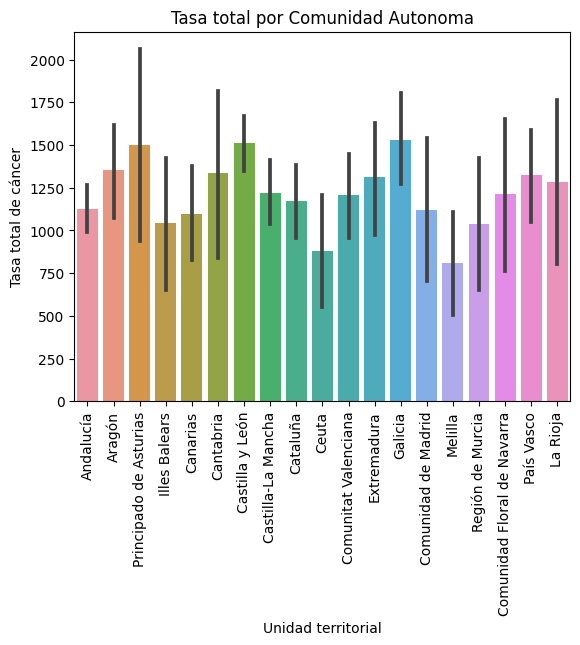

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='CCAA', y='Tasa total', data=dfinpre)
plt.xlabel('Unidad territorial')
plt.ylabel('Tasa total de cáncer')
plt.xticks(rotation=90)
plt.title('Tasa total por Comunidad Autonoma')
plt.show()

In [29]:
dfina1= dfin[[ 'CCAA', 'Dimension total']]

# agrupar por CCAA y calcular la suma de 'Tasa total'
di= dfina1.groupby('CCAA')['Dimension total'].sum()
di= pd.DataFrame(di)

In [30]:
fig = px.bar(di, x=di.index, y='Dimension total', color= 'Dimension total',title = 'Dimensión total por Comunidad Autonoma (CCAA)',
             labels = {'index': 'Unidad territorial', 'Media': 'Dimensión total del cáncer'})

fig.show()

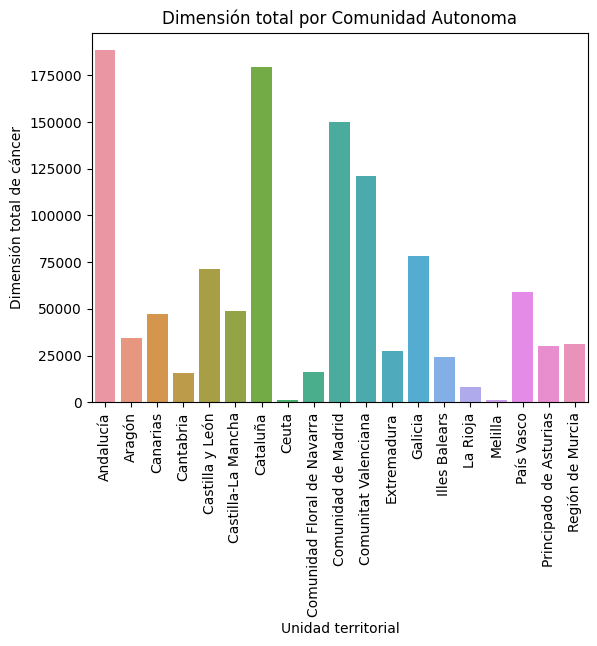

In [31]:
sns.barplot(x=di.index, y='Dimension total', data=di)
plt.xlabel('Unidad territorial')
plt.ylabel('Dimensión total de cáncer')
plt.xticks(rotation=90)
plt.title('Dimensión total por Comunidad Autonoma')
plt.show()

# ¿Cómo varía la incidencia de cáncer por grupo etario (0-39, 40-49, 50-59, 60-69, +70)?

In [32]:
dfin= df[df['Dimensión'] == 'Incidencia']

In [33]:
dfin

Unnamed: 0   Dimensión   Año                         CCAA  \
0             0  Incidencia  2019                    Andalucía   
1             1  Incidencia  2019                    Andalucía   
2             2  Incidencia  2019                    Andalucía   
3             3  Incidencia  2019                    Andalucía   
4             4  Incidencia  2019                    Andalucía   
..          ...         ...   ...                          ...   
203         203  Incidencia  2022  Comunidad Floral de Navarra   
204         204  Incidencia  2022                   País Vasco   
205         205  Incidencia  2022                   País Vasco   
206         206  Incidencia  2022                   País Vasco   
207         207  Incidencia  2022                     La Rioja   

    Unidad Territorial  Tasa total  Dimension total  0-39  40-49  50-59  ...  \
0              Almería      487.45             3494   160    276    632  ...   
1                Cádiz      531.17             6587   255    490   1198  ...   
2              Córdoba      591.63             4632   153    282    780  ...   
3              Granada      562.70             5146   186    340    887  ...   
4               Huelva      532.93             2781   110    212    485  ...   
..                 ...         ...              ...   ...    ...    ...  ...   
203            Navarra      617.69             4099   121    256    643  ...   
204        Araba/Álava      653.09             2183    58    133    333  ...   
205            Bizkaia      691.19             7940   192    445   1182  ...   
206           Gipuzkoa      673.82             4878   122    276    715  ...   
207          Rioja, La      651.85             2082    56    126    312  ...   

     Pulmón  Riñón  Sarcoma Kaposi  Testículo  Tiroides  Utero  Vagina  \
0       360    108               4         19        69     83       1   
1       684    202               7         29       127    163       3   
2       472    138               4         18        81    112       2   
3       528    155               5         21        94    125       2   
4       286     84               3         12        53     67       1   
..      ...    ...             ...        ...       ...    ...     ...   
203     427    124               4         14        69     92       2   
204     228     65               2          7        36     50       1   
205     822    237               7         23       129    188       4   
206     508    146               4         15        79    113       2   
207     216     62               2          6        34     46       1   

     Vejiga  Vesicula Biliar  Vulva  
0       226               20     13  
1       426               38     25  
2       308               29     18  
3       340               31     19  
4       181               16     10  
..      ...              ...    ...  
203     273               10     14  
204     146                5      7  
205     529               21     29  
206     327               12     17  
207     140                5      7  

[208 rows x 49 columns]

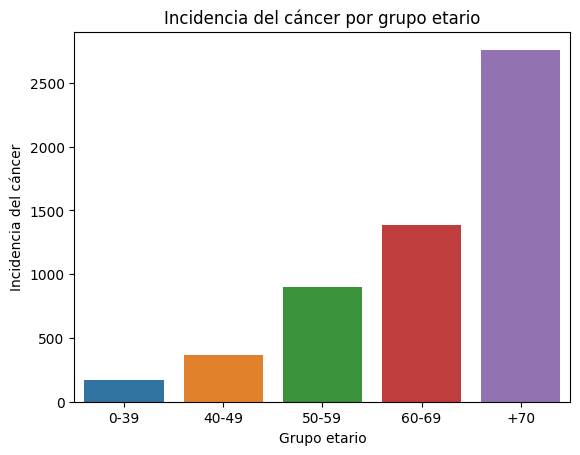

In [34]:
# Vamos a hacer un dataframe solo con la edad y su media de incidencia

dfedad= in22[['0-39', '40-49', '50-59', '60-69', '+70']]
dfedad.mean()
edad= pd.DataFrame(dfedad.mean())
edad.columns = ['Media']

# Creamos la gráfica

sns.barplot(x=edad.index, y='Media', data=edad)
plt.xlabel('Grupo etario')
plt.ylabel('Incidencia del cáncer')
plt.title('Incidencia del cáncer por grupo etario')
plt.show()

In [35]:
fig = px.bar(edad, x=edad.index, y='Media', color= 'Media',title = 'Incidencia del cáncer por grupo etario',
             labels = {'index': 'Grupo etario', 'Media': 'Incidencia del cáncer'})

fig.show()

In [36]:
# Vamos a tranformar los datos con log y ver si tienen una distribución normal
data = np.log(in22['0-39'])
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('No podemos rechazar que provengan de una distribución Gaussiana')
else:
	print('No sigue una distribución Gaussiana')

stat=0.980, p=0.519
No podemos rechazar que provengan de una distribución Gaussiana


In [37]:
data = np.log(in22['40-49'])
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('No podemos rechazar que provengan de una distribución Gaussiana')
else:
	print('No sigue una distribución Gaussiana')

stat=0.981, p=0.558
No podemos rechazar que provengan de una distribución Gaussiana


In [38]:
data = np.log(in22['50-59'])
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('No podemos rechazar que provengan de una distribución Gaussiana')
else:
	print('No sigue una distribución Gaussiana')

stat=0.985, p=0.744
No podemos rechazar que provengan de una distribución Gaussiana


In [39]:
data = np.log(in22['60-69'])
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('No podemos rechazar que provengan de una distribución Gaussiana')
else:
	print('No sigue una distribución Gaussiana')

stat=0.982, p=0.634
No podemos rechazar que provengan de una distribución Gaussiana


In [40]:

data = np.log(in22['+70'])
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('No podemos rechazar que provengan de una distribución Gaussiana')
else:
	print('No sigue una distribución Gaussiana')

stat=0.961, p=0.086
No podemos rechazar que provengan de una distribución Gaussiana


In [41]:
# Como ya sigue una normal podemos hacr un ANOVA

# Dividir los datos
jovenes = np.log(in22['0-39'])
maduros= np.log(in22['40-49'])
mayores= np.log(in22['50-59'])
muymayores= np.log(in22['60-69'])
ancianos = np.log(in22['+70'])

# Realizar un ANOVA
stat, p = f_oneway(jovenes,maduros,mayores,muymayores,ancianos)
print('stat=%.3f, p=%.41f' % (stat, p))

# Imprimir el resultado
if p > 0.05:
    print(f'No hay una diferencia significativa en la incidencia de cáncer por edad (p={p:.41f}, t={stat:.4f}).')
    
else:
    print(f'Hay una diferencia significativa en la incidencia de cáncer por edad (p={p:.41f}, t={stat:.4f}).')

stat=71.542, p=0.00000000000000000000000000000000000000015
Hay una diferencia significativa en la incidencia de cáncer por edad (p=0.00000000000000000000000000000000000000015, t=71.5416).


In [42]:
# Dividir los datos en dos muestras: jovenes y mayores 
jovenes = np.log(in22['60-69'])
ancianos = np.log(in22['+70'])

# Realizar una prueba t de dos muestras
t, p = ttest_ind(jovenes, ancianos)

# Imprimir el resultado
if p > 0.05:
    print(f'No hay una diferencia significativa en la incidencia de cáncer entre jovenes y ancianos (p={p:.4f}, t={t:.4f}).')
    
else:
    print(f'Hay una diferencia significativa en la incidencia de cáncer entre jovenes y ancianos (p={p:.4f}, t={t:.4f}).')

Hay una diferencia significativa en la incidencia de cáncer entre jovenes y ancianos (p=0.0003, t=-3.7810).


# ¿Existe alguna diferencia significativa en la incidencia de cáncer entre hombres y mujeres?

In [43]:
# Vamos a hacer un dataframe solo con los sexos y su media de incidencia

dfsexo= in22[['Hombre','Mujer']]

sexo= pd.DataFrame(dfsexo.mean())
sexo

0
Hombre  3249.229038
Mujer   2333.348846

In [44]:
fig = px.pie(sexo, values=0, names=sexo.index, title='Porcentaje de incidencia de cáncer por sexo')
fig.show()

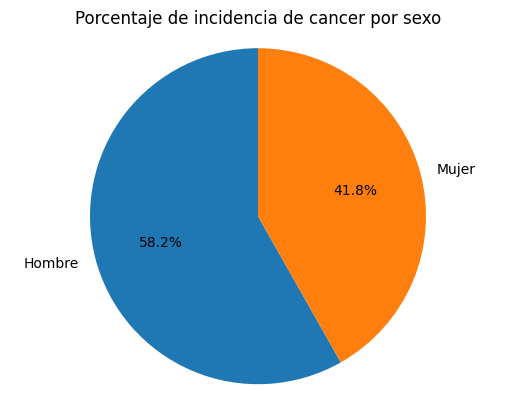

In [45]:
# Datos

medias = [3249.229038, 2333.348846]
sexos = ['Hombre', 'Mujer']

# Crear el gráfico de pastel

fig, ax = plt.subplots()
ax.pie(medias, labels=sexos, autopct='%1.1f%%', startangle=90)

# Ajustar el tamaño del gráfico y agregar un título

ax.axis('equal')
ax.set_title('Porcentaje de incidencia de cancer por sexo')

# Mostrar el gráfico
plt.show()

In [46]:
# Normalizamos los datos 
data = np.log(in22['Hombre'])
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('No podemos rechazar que provengan de una distribución Gaussiana')
else:
	print('No sigue una distribución Gaussiana')

stat=0.976, p=0.372
No podemos rechazar que provengan de una distribución Gaussiana


In [47]:
data = np.log(in22['Mujer'])
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('No podemos rechazar que provengan de una distribución Gaussiana')
else:
	print('No sigue una distribución Gaussiana')

stat=0.979, p=0.476
No podemos rechazar que provengan de una distribución Gaussiana


In [48]:

# Dividir los datos en dos muestras: hombres y mujeres
hombres = np.log(in22['Hombre'])
mujeres = np.log(in22['Mujer'])

# Realizar una prueba t de dos muestras
t, p = ttest_ind(hombres, mujeres)

# Imprimir el resultado
if p > 0.05:
    print(f'No hay una diferencia significativa en la incidencia de cáncer entre hombres y mujeres (p={p:.4f}, t={t:.4f}).')
else:
    print(f'Hay una diferencia significativa en la incidencia de cáncer entre hombres y mujeres (p={p:.4f}, t={t:.4f}).')

Hay una diferencia significativa en la incidencia de cáncer entre hombres y mujeres (p=0.0479, t=2.0021).


# ¿Qué tipos de cáncer producen más muerte al año?

In [49]:
dfmo = df[(df['Dimensión'] == 'Mortalidad')]

In [50]:
# Vamos a hacer un dataframe 
dfmo = df[(df['Dimensión'] == 'Mortalidad')]
dfmotipo= dfmo[['Cerebro', 'Cervix',
       'Colorectal', 'Esofago', 'Estómago', 'Glándulas salivares', 'Hígado',
       'Hipofaringe', 'Labio, cavidad oral', 'Laringe', 'Leucemia',
       'Linfoma Hodgkin', 'Linfoma No-Hodgkin', 'Mama', 'Melanoma de piel',
       'Mesotelioma', 'Mieloma Multiple', 'Nasofaringe', 'Orofaringe',
       'Otros de piel', 'Ovario', 'Páncreas', 'Pene', 'Próstata', 'Pulmón',
       'Riñón', 'Sarcoma Kaposi', 'Testículo', 'Tiroides', 'Utero', 'Vagina',
       'Vejiga', 'Vesicula Biliar', 'Vulva']]
dfmotipo.sum()
tipomo= pd.DataFrame(dfmotipo.sum())
tipomo.columns = ['Suma']

# Creamos la gráfica

fig = px.bar(tipomo, x=tipomo.index, y='Suma', color= 'Suma',title = 'Número de muertes por tipos de cáncer',
             labels = {'index': 'Tipos de cáncer', 'Media': 'Cantidad de muertes'})

fig.show()

In [51]:
# Vamos a hacer un dataframe 
dfinpre = df[(df['Dimensión'] == 'Incidencia') | (df['Dimensión'] == 'Prevalencia')]
dftipo= dfinpre[['Cerebro', 'Cervix',
       'Colorectal', 'Esofago', 'Estómago', 'Glándulas salivares', 'Hígado',
       'Hipofaringe', 'Labio, cavidad oral', 'Laringe', 'Leucemia',
       'Linfoma Hodgkin', 'Linfoma No-Hodgkin', 'Mama', 'Melanoma de piel',
       'Mesotelioma', 'Mieloma Multiple', 'Nasofaringe', 'Orofaringe',
       'Otros de piel', 'Ovario', 'Páncreas', 'Pene', 'Próstata', 'Pulmón',
       'Riñón', 'Sarcoma Kaposi', 'Testículo', 'Tiroides', 'Utero', 'Vagina',
       'Vejiga', 'Vesicula Biliar', 'Vulva']]
dftipo.sum()
tipo= pd.DataFrame(dftipo.sum())
tipo.columns = ['Suma']

In [52]:
# Calculamos el porcentaje de muertes por tipo de cáncer. Letalidad = (Número de muertes por cáncer / Número de personas diagnosticadas con cáncer) x 100
pormu= ((tipomo/tipo)*100).round(2)

# Creamos la gráfica

fig = px.bar(pormu, x=pormu.index, y='Suma', color= 'Suma',title = 'Letalidad de los tipos de cáncer',
             labels = {'index': 'Tipos de cáncer', 'Suma': 'Letalidad (%)'})

fig.show()

# ¿Cómo varía la incidencia de cáncer de mama entre mujeres por unidad territorial?

In [53]:
# Creamos el dataframe
dfm1= dfin[(dfin['CCAA'] == 'Andalucía') | (dfin['CCAA'] == 'Cataluña')| (dfin['CCAA']== 'Comunidad de Madrid')]
dfmm= dfm1[[ 'CCAA', 'Mama']]

# Agrupar por CCAA y cáncer de piel
mam= dfmm.groupby('CCAA')['Mama'].sum()
mam= pd.DataFrame(mam)

mam= mam.assign(Tasa_total=[274.72,283.72,284.43])

In [54]:
fig = px.bar(mam, x=mam.index, y='Mama', color= 'Mama',title = 'Tasa total del cáncer de mama por CCAA',
             labels = {'CCAA': 'Unidad territorial', 'Mama': 'Tasa del cáncer'})

fig.show()

In [55]:
dfina2= dfin[[ 'CCAA', 'Mama']]
# agrupar por año y calcular la media de 'Tasa total'
ma= dfina2.groupby('CCAA')['Mama'].sum()
ma= pd.DataFrame(ma)

In [56]:
# Creamos la gráfica

fig = px.bar(ma, x=ma.index, y='Mama', color= 'Mama',title = 'Dimensión del cáncer de mama por CCAA',
             labels = {'index': 'Unidad territorial', 'Mama': 'Dimensión del cáncer'})

fig.show()

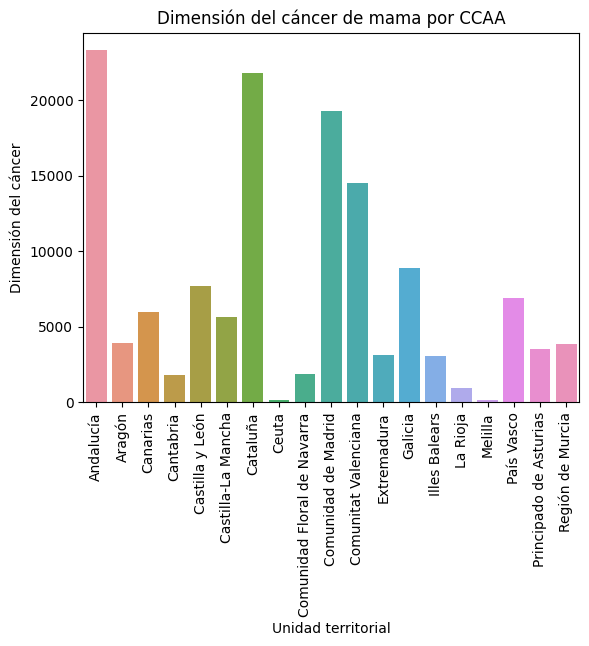

In [57]:
sns.barplot(x=ma.index, y='Mama', data=ma)
plt.xlabel('Unidad territorial')
plt.ylabel('Dimensión del cáncer')
plt.xticks(rotation=90)
plt.title('Dimensión del cáncer de mama por CCAA')
plt.show()

# ¿Cuáles son las tasas de incidencia de cáncer de próstata entre hombres por unidad territorial?

In [58]:
An= (23253/8478084)*100000
Ca= (21726/7675217)*100000
CM= (17554/6779888)*100000
print(An,Ca,CM)

274.2718755794352 283.06691524161465 258.9128315983981


In [59]:
# Creamos el dataframe

dfmm= dfm1[[ 'CCAA', 'Próstata']]

# Agrupar por CCAA y cáncer de piel
pros= dfmm.groupby('CCAA')['Próstata'].sum()
pros= pd.DataFrame(pros)

pros= pros.assign(Tasa_total=[274.27,283.07,258.91])


In [60]:
fig = px.bar(pros, x=pros.index, y='Próstata', color= 'Próstata',title = 'Tasa total del cáncer de próstata por CCAA',
             labels = {'CCAA': 'Unidad territorial', 'Próstata': 'Tasa del cáncer'})

fig.show()

In [61]:
dfina3= dfin[[ 'CCAA', 'Próstata']]
# agrupar por año y calcular la media de 'Tasa total'
pro= dfina3.groupby('CCAA')['Próstata'].sum()
pro= pd.DataFrame(pro)

In [62]:
fig = px.bar(pro, x=pro.index, y='Próstata', color= 'Próstata',title = 'Dimensión del cácer de próstata por CCAA',
             labels = {'index': 'Unidad territorial', 'Próstata': 'Dimensión del cáncer'})

fig.show()

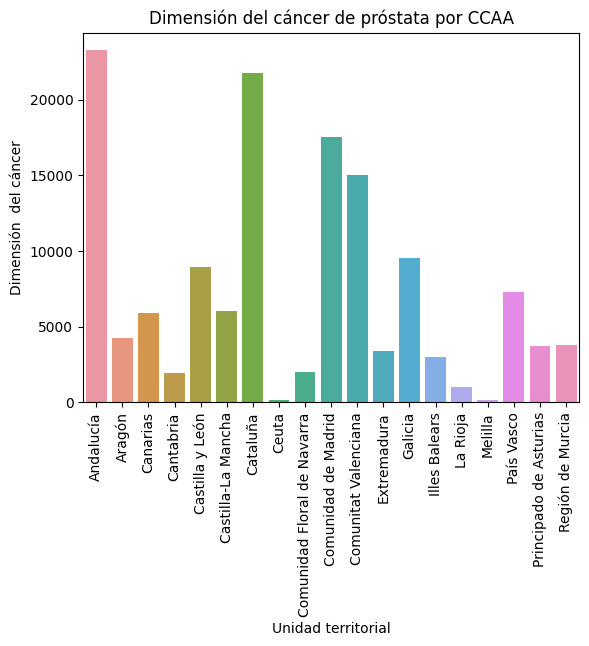

In [63]:
sns.barplot(x=pro.index, y='Próstata', data=pro)
plt.xlabel('Unidad territorial')
plt.ylabel('Dimensión  del cáncer')
plt.xticks(rotation=90)
plt.title('Dimensión del cáncer de próstata por CCAA')
plt.show()

# ¿Cuál es la distribución geográfica de los casos de melanoma de piel?

In [70]:
# Creamos el dataframe
dfsn= dfin[(dfin['CCAA'] == 'Andalucía') | (dfin['CCAA'] == 'Galicia')| (dfin['CCAA'] == 'País Vasco')]
dfnsp= dfsn[[ 'CCAA', 'Otros de piel']]

# Agrupar por CCAA y cáncer de piel
pi= dfnsp.groupby('CCAA')['Otros de piel'].sum()
pi= pd.DataFrame(pi)

pi= pi.assign(Tasa_total=[160.25,254.68,218.54])


In [71]:
pi


Otros de piel  Tasa_total
CCAA                                 
Andalucía           13586      160.25
Galicia              6854      254.68
País Vasco           4767      218.54

In [72]:
fig = px.bar(pi, x=pi.index, y='Tasa_total', color= 'Tasa_total',title = 'Tasa total en Andalucía y Galicia',
             labels = {'CCAA': 'Unidad territorial', 'Tasa_total': 'Tasa del cáncer'})

fig.show()

In [58]:
dfina4= dfin[[ 'CCAA', 'Melanoma de piel']]
# agrupar por año y calcular la media de 'Tasa total'
me= dfina4.groupby('CCAA')['Melanoma de piel'].sum()
me= pd.DataFrame(me)

In [59]:
fig = px.bar(me, x=me.index, y='Melanoma de piel', color= 'Melanoma de piel',title = 'Dimensión del melanoma de piel por CCAA',
             labels = {'index': 'Unidad territorial', 'Melanoma de piel': 'Dimensión del cáncer'})

fig.show()

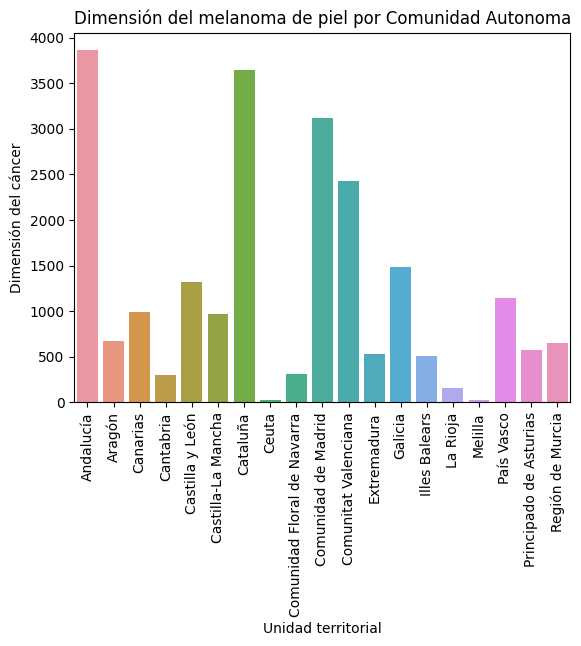

In [200]:
sns.barplot(x=me.index, y='Melanoma de piel', data=me)
plt.xlabel('Unidad territorial')
plt.ylabel('Dimensión del cáncer')
plt.xticks(rotation=90)
plt.title('Dimensión del melanoma de piel por Comunidad Autonoma')
plt.show()


# ¿Cómo se distribuyen los casos de cáncer colorrectal entre las diferentes unidades territoriales?

In [93]:
An= (26558/8478084)*100000
Ca= (25546/7675217)*100000
CM= (21168/6779888)*100000
print(An,Ca,CM)

313.25474010401405 332.8374950180562 312.2175469565279


In [97]:
dfm1.columns

Index(['Unnamed: 0', 'Dimensión', 'Año', 'CCAA', 'Unidad Territorial',
       'Tasa total', 'Dimension total', '0-39', '40-49', '50-59', '60-69',
       '+70', 'Mujer', 'Hombre', 'Cerebro', 'Cervix', 'Colorectal', 'Esofago',
       'Estómago', 'Glándulas salivares', 'Hígado', 'Hipofaringe',
       'Labio, cavidad oral', 'Laringe', 'Leucemia', 'Linfoma Hodgkin',
       'Linfoma No-Hodgkin', 'Mama', 'Melanoma de piel', 'Mesotelioma',
       'Mieloma Multiple', 'Nasofaringe', 'Orofaringe', 'Otros',
       'Otros de piel', 'Ovario', 'Páncreas', 'Pene', 'Próstata', 'Pulmón',
       'Riñón', 'Sarcoma Kaposi', 'Testículo', 'Tiroides', 'Utero', 'Vagina',
       'Vejiga', 'Vesicula Biliar', 'Vulva'],
      dtype='object')

In [98]:
# Creamos el dataframe

dfmco= dfm1[[ 'CCAA', 'Colorectal']]

# Agrupar por CCAA y cáncer de piel
colo= dfmco.groupby('CCAA')['Colorectal'].sum()
colo= pd.DataFrame(colo)

colo= colo.assign(Tasa_total=[313.25,332.84,312.22])
colo

Colorectal  Tasa_total
CCAA                                       
Andalucía                 26558      313.25
Cataluña                  25546      332.84
Comunidad de Madrid       21168      312.22

In [99]:
fig = px.bar(colo, x=colo.index, y='Tasa_total', color= 'Tasa_total',title = 'Tasa total del cáncer colorrectal por CCAA',
             labels = {'CCAA': 'Unidad territorial', 'Tasa_total': 'Tasa del cáncer'})

fig.show()

In [60]:
dfina5= dfin[[ 'CCAA', 'Colorectal']]
# agrupar por año y calcular la media de 'Tasa total'
co= dfina5.groupby('CCAA')['Colorectal'].sum()
co= pd.DataFrame(co)

In [61]:
fig = px.bar(co, x=co.index, y='Colorectal', color= 'Colorectal',title = 'Dimensión del cácer coloorrectal por CCAA',
             labels = {'index': 'Unidad territorial', 'Próstata': 'Dimensión del cáncer'})

fig.show()

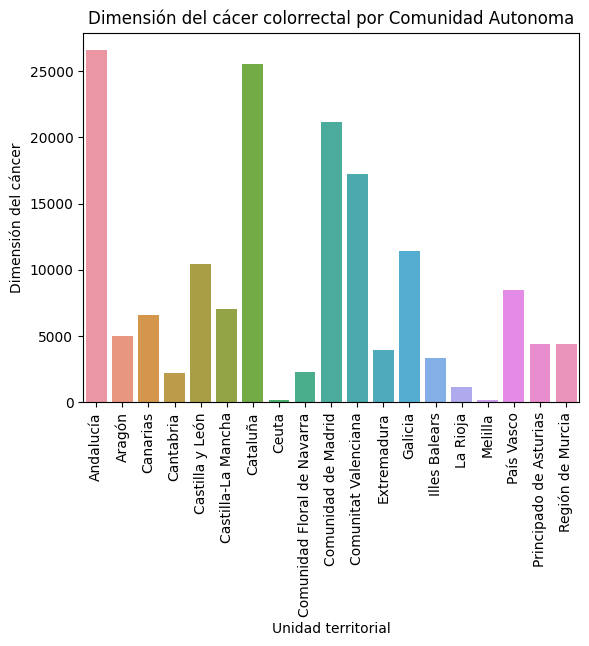

In [202]:
sns.barplot(x=co.index, y='Colorectal', data=co)
plt.xlabel('Unidad territorial')
plt.ylabel('Dimensión del cáncer')
plt.xticks(rotation=90)
plt.title('Dimensión del cácer colorrectal por Comunidad Autonoma')
plt.show()

# Predicción en los próximos años.

In [203]:
dfin= df[df['Dimensión'] == 'Incidencia']

In [204]:
dfin['Año'] = pd.to_datetime(dfin['Año'], format='%Y')


C:\Users\marco\AppData\Local\Temp\ipykernel_6628\2428990793.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [66]:
dfina= dfin[[ 'Año', 'Tasa total']]


In [67]:
dfina= dfin[[ 'Año', 'Tasa total']]
# agrupar por año y calcular la media de 'Tasa total'
media_anual = dfina.groupby('Año')['Tasa total'].mean()
media_anual= pd.DataFrame(media_anual)


Coeficientes del modelo:
Intercepto: 229.06173094408604
Pendiente: 2.551031439877314e-07


C:\Users\marco\AppData\Local\Temp\ipykernel_6628\2280728956.py:2: FutureWarning:

The behavior of .astype from datetime64[ns] to int32 is deprecated. In a future version, this astype will return exactly the specified dtype instead of int64, and will raise if that conversion overflows.



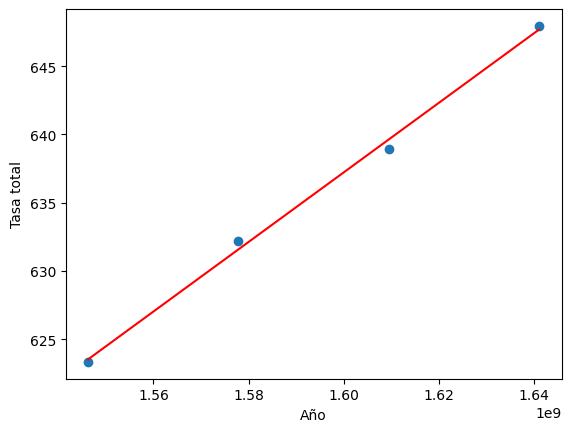

In [207]:

# Crear variables predictoras y de respuesta
X = media_anual.index.astype(int) / 10**9
y = media_anual['Tasa total']

# Crear y ajustar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X.values.reshape(-1, 1), y)

# Imprimir los coeficientes del modelo
print('Coeficientes del modelo:')
print('Intercepto:', modelo.intercept_)
print('Pendiente:', modelo.coef_[0])

# Graficar los datos y la línea de regresión
plt.scatter(X, y)
plt.plot(X, modelo.predict(X.values.reshape(-1, 1)), color='red')
plt.xlabel('Año')
plt.ylabel('Tasa total')
plt.show()

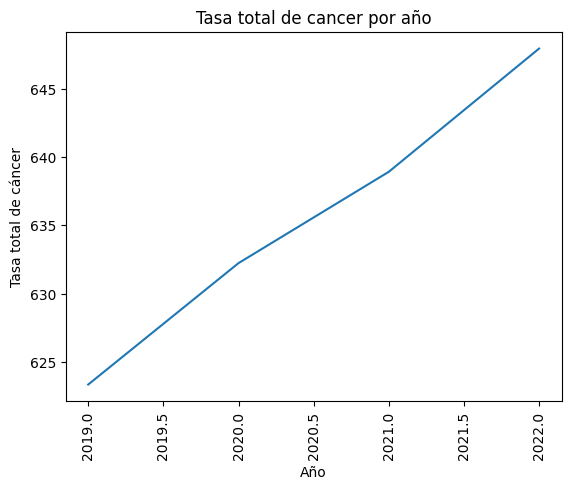

In [72]:
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Graficar la evolución del dataset
fig,ax= plt.subplots()
plt.plot(media_anual.index, media_anual['Tasa total'])
plt.xlabel('Año')
plt.ylabel('Tasa total de cáncer')
plt.title('Tasa total de cancer por año')
plt.xticks(rotation=90)
plt.show()

In [69]:
fig = px.line(media_anual, x=media_anual.index, y='Tasa total', title='Tasa total de cáncer por año')
fig.update_layout(xaxis_tickangle=-90)
fig.show()

In [71]:

warnings.filterwarnings("ignore") 

P = range(0, 6)
D = range(0, 3)
Q = range(0, 6)

best_aic = float("inf")
best_params = None

for p in P:
    for d in D:
        for q in Q:
            modelo_arima = ARIMA(media_anual, order=(p, d, q))
            results = modelo_arima.fit()
            current_aic = results.aic
            if current_aic < best_aic:
                best_aic = current_aic
                best_params = (p, d, q)
            print(f"modelo arima: ({p},{d},{q}) => AIC = {current_aic}")

print(f"\nBest model: ({best_params[0]}, {best_params[1]}, {best_params[2]}) => AIC = {best_aic}")

modelo arima: (0,0,0) => AIC = 32.946176535756756
modelo arima: (0,0,1) => AIC = 34.174143312858384
modelo arima: (0,0,2) => AIC = 36.24236576721701
modelo arima: (0,0,3) => AIC = 36.64384996581061
modelo arima: (0,0,4) => AIC = 38.232338834565624
modelo arima: (0,0,5) => AIC = 39.49169449365978
modelo arima: (0,1,0) => AIC = 23.19304534386761
modelo arima: (0,1,1) => AIC = 23.941736161754697
modelo arima: (0,1,2) => AIC = 24.648039464675364
modelo arima: (0,1,3) => AIC = 26.07907615955416
modelo arima: (0,1,4) => AIC = 27.428540625940947
modelo arima: (0,1,5) => AIC = 29.107765480896873
modelo arima: (0,2,0) => AIC = 10.956282436607342
modelo arima: (0,2,1) => AIC = 11.862004434596093
modelo arima: (0,2,2) => AIC = 13.2033872763973
modelo arima: (0,2,3) => AIC = 14.724460103676469
modelo arima: (0,2,4) => AIC = 16.346848123547012
modelo arima: (0,2,5) => AIC = 18.0353045580209
modelo arima: (1,0,0) => AIC = 34.30677531634479
modelo arima: (1,0,1) => AIC = 35.65796709813621
modelo arim

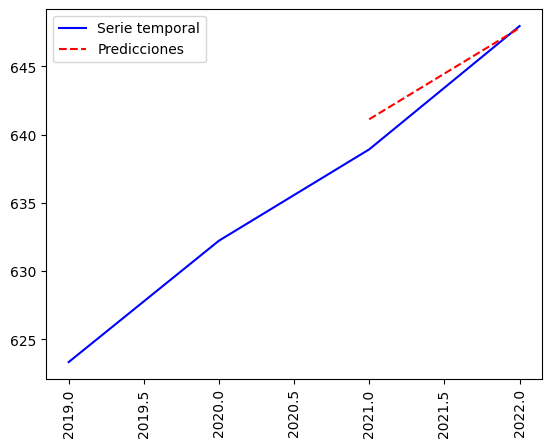

In [73]:
p = 1 # Coeficientes de autoregresión
d = 2 # Orden de diferenciación
q = 0 # Ajuste media móvil
# Ajustamos modelo a datos
model = ARIMA(media_anual, order=(p,d,q))
model_fit = model.fit()
# Tomamos predicciones
preds = model_fit.predict()
# Creamos figura
fig, ax = plt.subplots()
ax.plot(media_anual.index, media_anual.values, 'b-')
ax.plot(media_anual.index[d:], preds[d:], 'r--')
plt.xticks(rotation=90)
plt.legend(['Serie temporal', 'Predicciones'])
plt.show()

In [74]:
fig = px.line(media_anual, x=media_anual.index, y='Tasa total', title='Tasa total de cáncer por año')
fig.add_scatter(x=media_anual.index[d:], y=preds[d:], mode='lines', name='Predicciones', line=dict(color='red', dash='dash'))
fig.update_layout(xaxis_tickangle=-90)
fig.show()

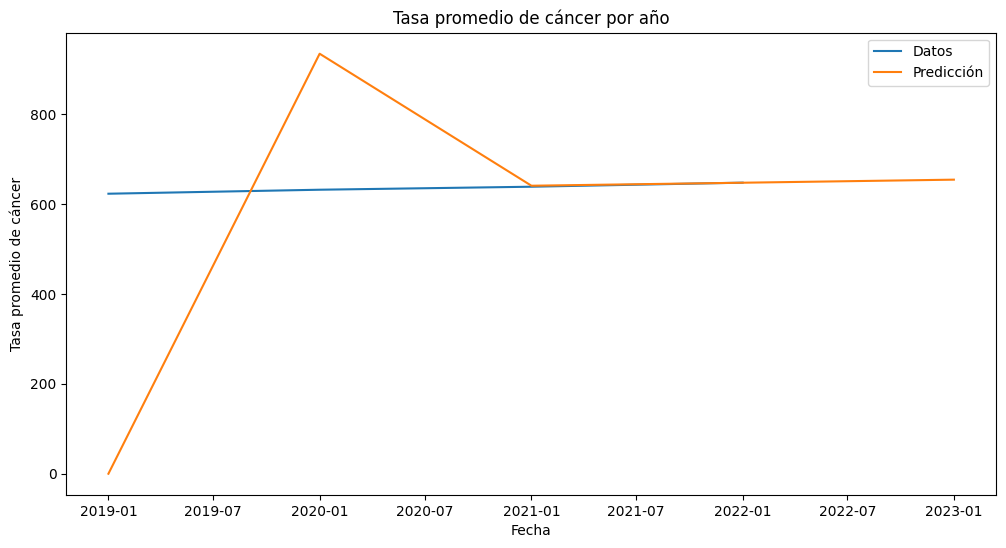

In [211]:
# Obtener la predicción completa
prediccion_completa = model_fit.predict(start=media_anual.index[0], end=media_anual.index[-1], typ='levels')

# Unir la predicción completa y la predicción futura en un solo array
preds = model_fit.forecast(steps=1)
prediccion_total = np.concatenate([prediccion_completa, preds])

# Crear un rango de fechas para la predicción total
prediccion_index = pd.date_range(start=media_anual.index[0], periods=len(media_anual) + len(preds), freq='YS')

# Graficar los datos originales y la predicción total
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(media_anual.index, media_anual, label='Datos')
ax.plot(prediccion_index, prediccion_total, label='Predicción')
ax.legend()
ax.set_title('Tasa promedio de cáncer por año')
ax.set_xlabel('Fecha')
ax.set_ylabel('Tasa promedio de cáncer')
plt.show()


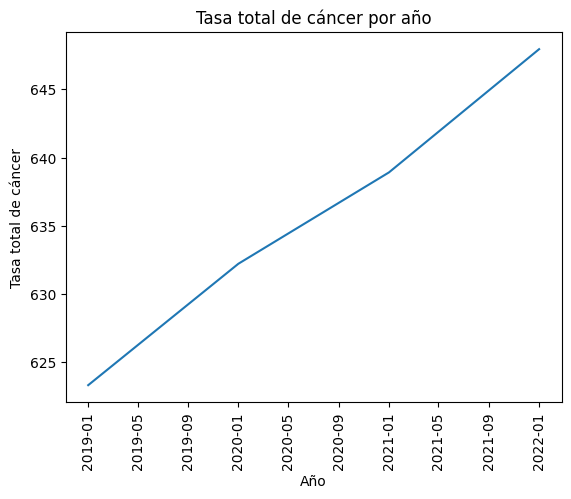

modelo arima: (0,0,0) => AIC = 32.946176535756756
modelo arima: (0,1,0) => AIC = 23.19304534386761
modelo arima: (0,2,0) => AIC = 10.956282436607342
modelo arima: (1,2,0) => AIC = 7.3014590922981375

Best model: (1, 2, 0) => AIC = 7.3014590922981375


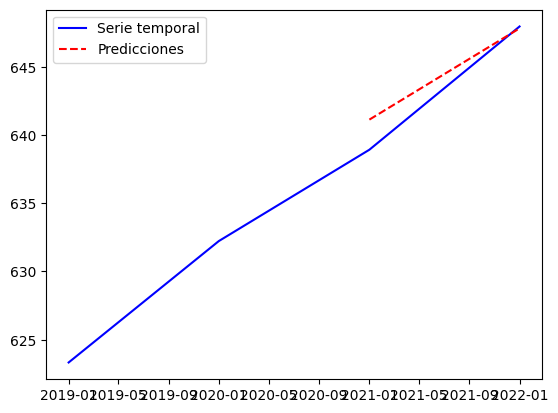

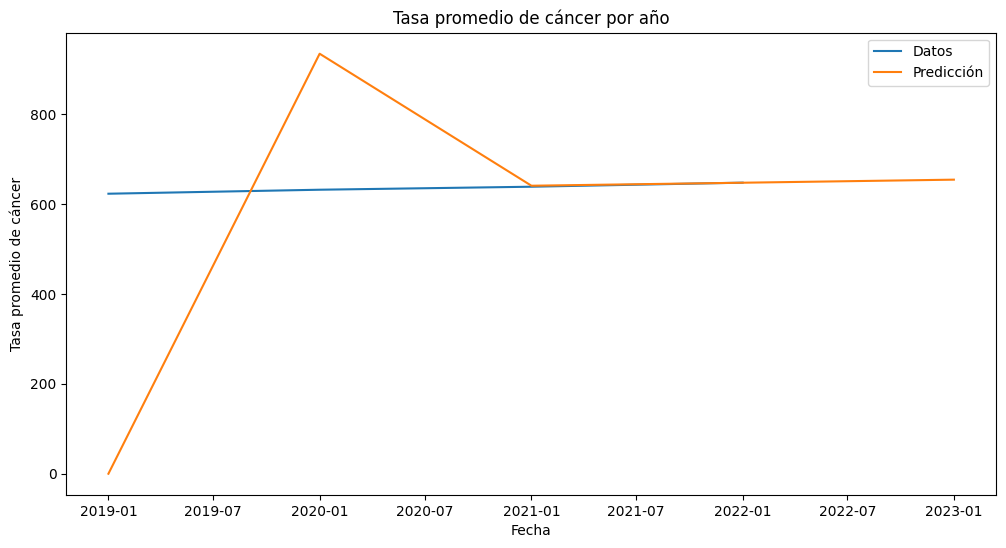

In [212]:


# Graficar la evolución de la tasa total de cáncer
fig, ax = plt.subplots()
plt.plot(media_anual.index, media_anual['Tasa total'])
plt.xlabel('Año')
plt.ylabel('Tasa total de cáncer')
plt.title('Tasa total de cáncer por año')
plt.xticks(rotation=90)
plt.show()


# Seleccionar los mejores parámetros de ARIMA
P = range(0, 6)
D = range(0, 3)
Q = range(0, 6)



best_aic = float("inf")
best_params = None



for p in P:
    for d in D:
        for q in Q:
            modelo_arima = ARIMA(media_anual, order=(p, d, q))
            results = modelo_arima.fit()
            current_aic = results.aic
            if current_aic < best_aic:
                best_aic = current_aic
                best_params = (p, d, q)
                print(f"modelo arima: ({p},{d},{q}) => AIC = {current_aic}")


print(f"\nBest model: ({best_params[0]}, {best_params[1]}, {best_params[2]}) => AIC = {best_aic}")


# Ajustar el modelo ARIMA
model = ARIMA(media_anual, order=best_params)
model_fit = model.fit()


# Obtener las predicciones
preds = model_fit.predict()



# Graficar la serie temporal y las predicciones
fig, ax = plt.subplots()
ax.plot(media_anual.index, media_anual.values, 'b-', label='Serie temporal')
ax.plot(media_anual.index[best_params[1]:], preds[best_params[1]:], 'r--', label='Predicciones')

plt.legend()
plt.show()



# Pronosticar un paso adelante
preds = model_fit.forecast(steps=1)



# Crear un rango de fechas para la predicción total
prediccion_index = pd.date_range(start=media_anual.index[0], periods=len(media_anual) + len(preds), freq='YS')



# Unir la predicción completa y la predicción futura en un solo array
prediccion_total = model_fit.predict(start=media_anual.index[0], end=prediccion_index[-2], typ='levels').append(preds)



# Graficar los datos originales y la predicción total
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(media_anual.index, media_anual, label='Datos')
ax.plot(prediccion_index, prediccion_total, label='Predicción')
ax.legend()
ax.set_title('Tasa promedio de cáncer por año')
ax.set_xlabel('Fecha')
ax.set_ylabel('Tasa promedio de cáncer')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


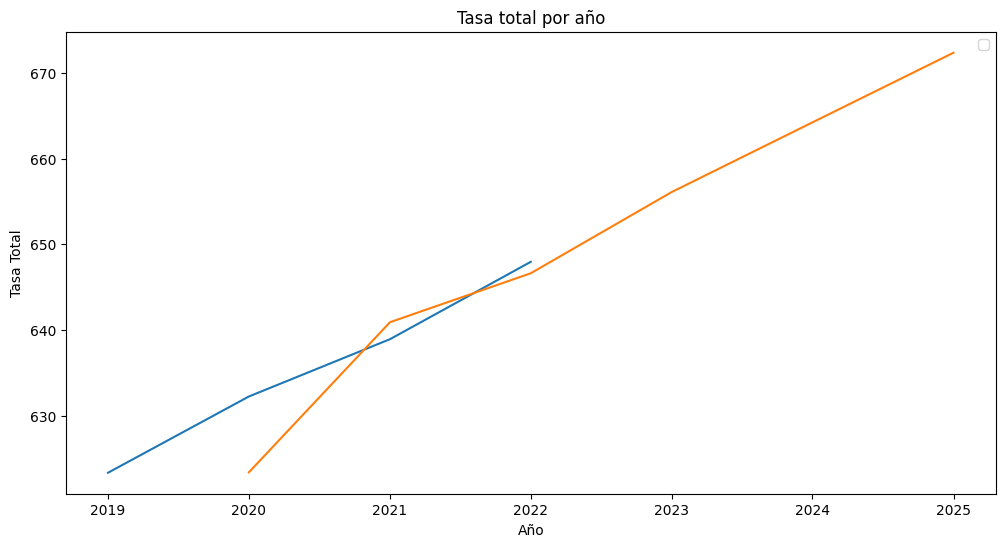

In [86]:

# Leer los datos en un DataFrame
datos = pd.DataFrame({
    'Año': ['2019-01-01', '2020-01-01', '2021-01-01', '2022-01-01'],
    'Tasa Total': [623.331923, 632.226731, 638.918846, 647.947885]
})

# Convertir la columna 'Año' a tipo datetime y establecerla como índice
datos['Año'] = pd.to_datetime(datos['Año'])
datos.set_index('Año', inplace=True)

# Crear el modelo ARIMA y ajustarlo a los datos
modelo = ARIMA(datos, order=(1, 1, 1))
modelo_fit = modelo.fit()

# Hacer predicciones futuras
preds = modelo_fit.predict(start='2020-01-01', end='2025-01-01', typ='levels')

# Unir las predicciones con los datos originales
prediccion = pd.concat([datos, preds], axis=0)

# Graficar los datos y las predicciones
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(prediccion.index, prediccion)
ax.legend()
ax.set_title('Tasa total por año')
ax.set_xlabel('Año')
ax.set_ylabel('Tasa Total')
plt.show()


In [80]:
import plotly.express as px

fig = px.line(prediccion, x=prediccion.index, title='Tasa total de cáncer por año', labels={'x':'Año', 'y':'Tasa Total'})
fig.show()


In [77]:

fig = px.line(prediccion, x=prediccion.index, y=prediccion, title='Tasa total por año')
fig.update_traces(mode='markers+lines', name='Predicción', line=dict(color='red', dash='dash'))
fig.update_layout(xaxis_tickangle=-90, xaxis_title='Año', yaxis_title='Tasa Total')
fig.show()

KeyError: 0